# Breast Cancer Prediction using Logistic Regression

This project uses the **Breast Cancer Wisconsin Dataset** to build a Logistic Regression model for predicting whether a tumor is malignant (1) or benign (0).

We will perform preprocessing, exploratory data analysis, feature scaling, model training, and evaluation.

## Dataset Columns Explanation

- **id**: ID number (not useful for prediction).
- **diagnosis**: Target variable (M = Malignant, B = Benign).
- **radius_mean**: Mean of distances from center to points on perimeter.
- **texture_mean**: Standard deviation of gray-scale values.
- **perimeter_mean**: Mean size of the core tumor perimeter.
- **area_mean**: Mean area of the tumor.
- **smoothness_mean**: Mean of local variation in radius lengths.
- **compactness_mean**: Mean of perimeter² / area - 1.0.
- **concavity_mean**: Mean severity of concave portions of the contour.
- **concave points_mean**: Mean number of concave portions of the contour.
- **symmetry_mean**: Mean symmetry of the tumor.
- **fractal_dimension_mean**: Mean 'coastline approximation' - 1.
- The dataset also includes similar columns for _standard error_ and _worst_ values of these features.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns

## Load and Explore Dataset

In [2]:
data = pd.read_csv('data.csv')

print("First 5 rows:")
display(data.head())

print("\nDataset Info:")
print(data.info())

print("\nStatistical Summary:")
display(data.describe())

First 5 rows:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_s

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Data Preprocessing

Missing values per column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dime

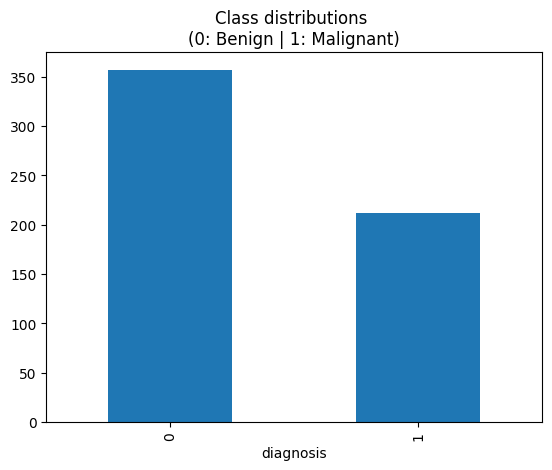

In [3]:
print("Missing values per column:")
print(data.isnull().sum())

print("\nNumber of duplicated rows:", data.duplicated().sum())

data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

data['diagnosis'] = [1 if val == "M" else 0 for val in data['diagnosis']]
data['diagnosis'] = data['diagnosis'].astype('category')

plot = data['diagnosis'].value_counts().plot(kind='bar', title="Class distributions \n(0: Benign | 1: Malignant)")
plt.show()

## Outlier Detection using IQR

In [4]:
num_cols = data.select_dtypes(include=np.number).columns

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

radius_mean: 14 outliers
texture_mean: 7 outliers
perimeter_mean: 13 outliers
area_mean: 25 outliers
smoothness_mean: 6 outliers
compactness_mean: 16 outliers
concavity_mean: 18 outliers
concave points_mean: 10 outliers
symmetry_mean: 15 outliers
fractal_dimension_mean: 15 outliers
radius_se: 38 outliers
texture_se: 20 outliers
perimeter_se: 38 outliers
area_se: 65 outliers
smoothness_se: 30 outliers
compactness_se: 28 outliers
concavity_se: 22 outliers
concave points_se: 19 outliers
symmetry_se: 27 outliers
fractal_dimension_se: 28 outliers
radius_worst: 17 outliers
texture_worst: 5 outliers
perimeter_worst: 15 outliers
area_worst: 35 outliers
smoothness_worst: 7 outliers
compactness_worst: 16 outliers
concavity_worst: 12 outliers
concave points_worst: 0 outliers
symmetry_worst: 23 outliers
fractal_dimension_worst: 24 outliers


## Feature Scaling

In [5]:
y = data['diagnosis']
X = data.drop('diagnosis', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

## Model Training - Logistic Regression

In [7]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

## Model Evaluation

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



## Confusion Matrix Visualization

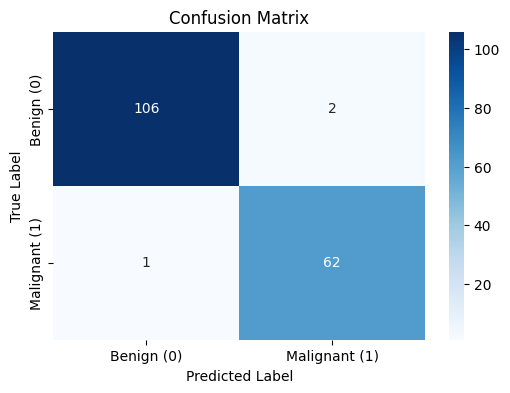

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign (0)", "Malignant (1)"],
            yticklabels=["Benign (0)", "Malignant (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()